# Paquete Lambda para segmentacion

In [1]:
!pip install boto3


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\nicoc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Carga inicial del ambiente

Defina dentro de S3 o Minio los archivos a subir.

Los datos a continuacion son de localhost, remplacelos.

In [37]:

# Configura tus credenciales y endpoint de MinIO aquí
ACCESS_KEY = 'ilF2NsVI6vwbYc052vbG'
SECRET_KEY = 'wRZY91TKq3Mr7I0YKPyRAQODR05fJgkwHTiUE4bX'
ENDPOINT_URL = 'http://localhost:9000'
BUCKET_NAME = 'ballotage'

# Configura la carpeta local de donde se cargarán las imágenes
FOLDER = "./files-examples/ballotage/"


In [7]:
import boto3
import os
import random
import matplotlib.pyplot as plt
from botocore.exceptions import ClientError


## Funciones de carga de archivos

In [47]:
# Función para verificar si un archivo existe en el bucket
def file_exists_in_bucket(bucket_name, key, s3_client):
    try:
        s3_client.head_object(Bucket=bucket_name, Key=key)
        return True
    except ClientError as e:
        # Si un cliente error es arrojado, entonces el objeto no existe.
        return False

# Función para subir archivos a S3 si no existen
def upload_files(folder, filename, bucket_name, s3_client, folder_key = "telegramas"):
    file_path = os.path.join(folder, filename)
    key = f"{folder_key}/{filename}"  # El path en el bucket donde se guardará la imagen
    
    # Verificar si el archivo ya existe
    if not file_exists_in_bucket(bucket_name, key, s3_client):
        s3_client.upload_file(file_path, bucket_name, key)
        print(f"Archivo {filename} cargado a {key}")
    else:
        print(f"Archivo {filename} ya existe en el bucket, no se vuelve a subir.")

# Función para descargar una imagen aleatoria y mostrarla
def download_random_image_and_show(bucket_name, s3_client):
    # Obtener el listado de objetos en el bucket
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix="telegramas/")
    
    # Crear una lista de las keys de los objetos
    objects = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.jpg')]
    
    # Seleccionar una key al azar
    if objects:
        random_key = random.choice(objects)
        # Descargar el objeto
        s3_client.download_file(bucket_name, random_key, random_key.split('/')[-1])
        
        # Mostrar la imagen
        img = plt.imread(random_key.split('/')[-1])
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("No hay imágenes disponibles para descargar.")


## Subida de Telegramas Fake

In [25]:
# Configura el cliente de S3 con tus credenciales y el endpoint de MinIO
s3_client = boto3.client('s3',
                         endpoint_url=ENDPOINT_URL,
                         aws_access_key_id=ACCESS_KEY,
                         aws_secret_access_key=SECRET_KEY,
                         region_name='us-east-1')

for numero in range(0, 21):  # Esto itera de 0 a 0, cambia a range(1, 100) para ir de 1 a 99
    FILE_TELEGRAM = f"mock_telegrama_{numero}.jpg"
    
    # Cargar el archivo si no existe en el bucket de MinIO
    upload_files(FOLDER, FILE_TELEGRAM, BUCKET_NAME, s3_client)


Archivo mock_telegrama_0.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_1.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_2.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_3.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_4.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_5.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_6.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_7.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_8.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_9.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_10.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_11.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama_12.jpg ya existe en el bucket, no se vuelve a subir.
Archivo mock_telegrama

## descarga y visualizacion aleatorio del fake

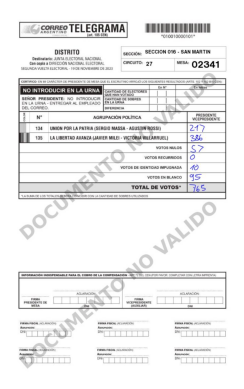

In [36]:
# Descargar una imagen aleatoria y mostrarla
download_random_image_and_show(BUCKET_NAME, s3_client)

# Subir Template a utilizar

El template es importante, ya que al utilizar 'SIFT' para alinear y adecuar la imagen (dentro de sus posibilidades) permite tambien ser una herramienta de deteccion de patrones celdas para recotar en los telegramas.

In [45]:
# Configura la carpeta local de donde se cargarán las imágenes
FOLDER_TEMPLATE = "./files-templates/"

In [48]:

# Configura el cliente de S3 con tus credenciales y el endpoint de MinIO
s3_client = boto3.client('s3',
                         endpoint_url=ENDPOINT_URL,
                         aws_access_key_id=ACCESS_KEY,
                         aws_secret_access_key=SECRET_KEY,
                         region_name='us-east-1')

FILE_TEMPLATE = f"AE-150-23-telegrama.tiff"
folder_key = "templates"

# Cargar el archivo si no existe en el bucket de MinIO
upload_files(FOLDER_TEMPLATE, FILE_TEMPLATE, BUCKET_NAME, s3_client, folder_key)


Archivo AE-150-23-telegrama.tiff cargado a templates/AE-150-23-telegrama.tiff


# Script Lambda Fake

Aqui se simula la ejecucion del lambda en un entorno controlado.

In [39]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./segmentation_cropping/segmentation/')
sys.path.append('./segmentation_cropping/')

In [61]:
import os
import json

# Simulando el evento que desencadena Lambda
fake_event = {
    'code': 'mock_telegrama_0',
    'image_path': 'telegramas/mock_telegrama_0.jpg',
    'template_path': 'templates/AE-150-23-telegrama.tiff'
}

# Simulando el contexto (si es necesario)
class FakeContext:
    def __init__(self):
        self.aws_request_id = 'fake_request_id'
        # Agrega aquí más atributos si tu función los utiliza

fake_context = FakeContext()

# Estableciendo las variables de entorno
os.environ['BUCKET_OCR_IMAGES'] = BUCKET_NAME
os.environ['BOI_ENDPOINT_URL'] = ENDPOINT_URL
os.environ['BOI_ACCESS'] = ACCESS_KEY
os.environ['BOI_SECRET'] = SECRET_KEY

# Asegúrate de importar tu función después de establecer las variables de entorno
from segmentation_cropping.segmentation_handler import lambda_handler

# Llamando a la función lambda_handler con el evento y contexto simulados
response = lambda_handler(fake_event, fake_context)

# Imprimiendo la respuesta
print(response)

Advertencia: se detectaron 14 filas, pero se esperaban 17.
{'statusCode': 200, 'body': '"Image processed successfully!"'}
